In [1]:
import numpy as np
import matplotlib.pyplot as plt

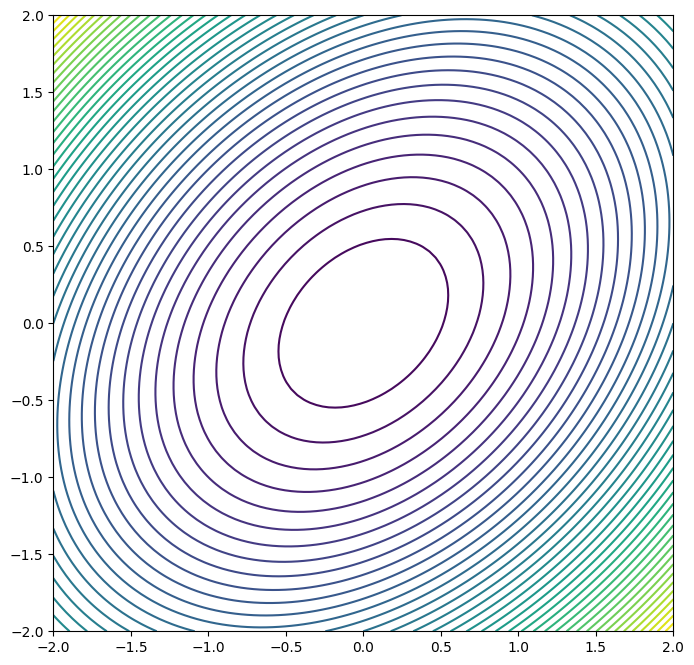

In [4]:
def M_contours(M):
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    xx, yy = np.meshgrid(x, y)

    Z = M[0, 0] * xx**2 + M[1, 0] * xx * yy + M[0, 1] * xx * yy + M[1, 1] * yy**2

    fig,ax = plt.subplots(1,1, figsize=[8,8])
    plt.contour(xx, yy, Z, levels=40)
    
M = np.array([[3,-1],[-1,3]])
M_contours(M)


In [9]:
# Implement steepest descent here.

def sd(A, b, x0, kmax):
    
    n = len(x0)
    x = np.zeros([n, kmax+1])
    x[:,0] = x0
    
    for k in range(kmax):
        r = b - A @ x[:,k]
        alpha = (r @ r) / (r @ (A @ r))
        x[:,k+1] = x[:,k] + alpha * r
    
    return x


[0.27065252 0.00270653]


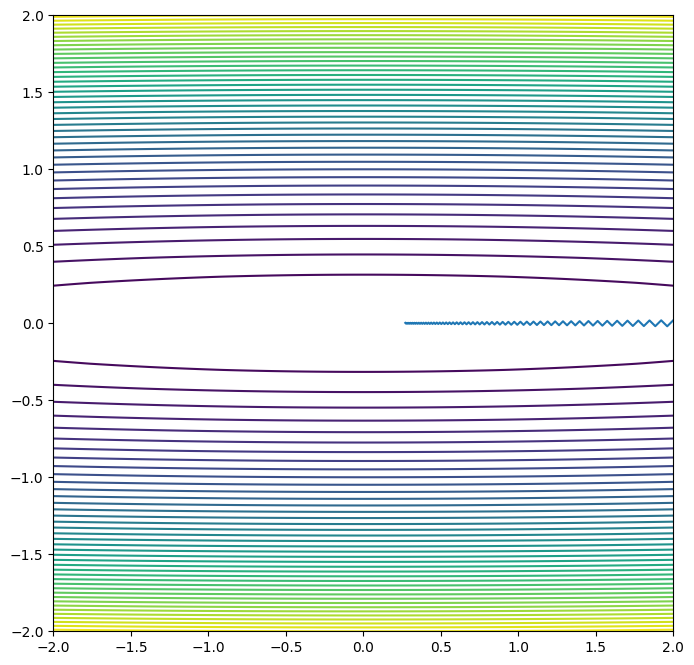

In [26]:
M = np.array([[2,0],[0,200]])
b = np.zeros(2)

M_contours(M)

x0 = np.array([2,0.02])
path = sd(M, b, x0, 100)
plt.plot(path[0,:], path[1,:])

print(path[:,-1])

TODO:
1. Make a table with l2 error and energy-norm error.
2. implement CG 
3. Try higher-dimensional examples 
    - Generate some 3 by 3 and 4 by 4 by hand
    - Use the model problem from homework 5


In [40]:
# Conjugate gradient method
def cg(A, b, x0, kmax, TOL=1e-8):
    x = np.zeros([2, kmax+1])
    x[:,0] = x0

    r = b - A @ x[:,0]
    d = r
    
    for k in range(kmax):
        if np.linalg.norm(r) < TOL:
            return x[:,:k+1]
        alpha = (r @ r) / (d @ (A @ d))
        x[:,k+1] = x[:,k] + alpha * d
        rr = r @ r
        r = r - alpha * A @ d
        beta = (r @ r) / rr
        d = r + beta * d

    return x

[ 1.11022302e-16 -5.55111512e-17]


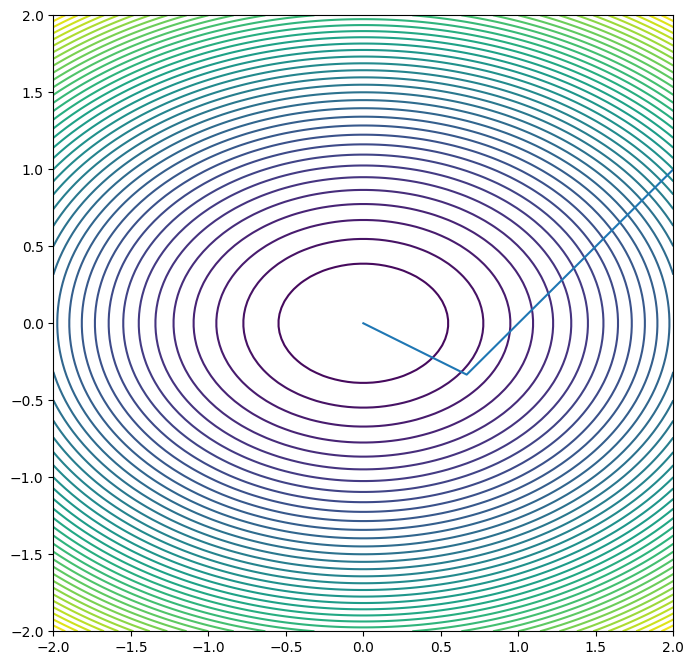

In [60]:
M = np.array([[1,0],[0,2]])
b = np.zeros(2)

M_contours(M)

x0 = np.array([2, 1])
path = cg(M, b, x0, 100)
plt.plot(path[0,:], path[1,:])

print(path[:,-1])